In [ ]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.04 s (started: 2024-03-04 04:30:52 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

time: 712 µs (started: 2024-03-04 04:30:59 +00:00)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv
time: 11.1 s (started: 2024-03-04 04:30:59 +00:00)


In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


time: 121 ms (started: 2024-03-04 04:31:10 +00:00)


In [ ]:
data.shape

(299, 13)

time: 6.63 ms (started: 2024-03-04 04:31:10 +00:00)


<ipython-input-42-d578c0e1fb98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['DEATH_EVENT'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-42-d578c0e1fb98>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['DEATH_EVENT'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


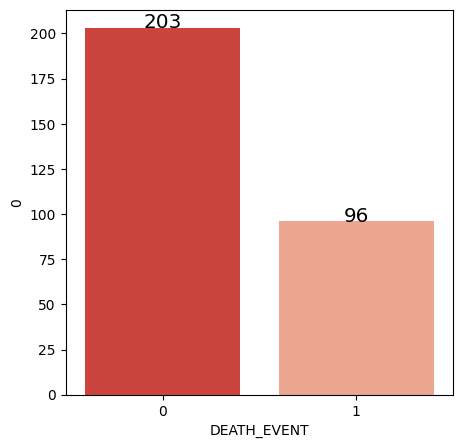

time: 454 ms (started: 2024-03-04 04:31:10 +00:00)


In [ ]:
plt.figure(figsize=(5,5))
target_group = data.groupby('DEATH_EVENT').size().reset_index()
pal = sns.color_palette("Reds", len(target_group))
rank = target_group['DEATH_EVENT'].argsort().argsort()
g = sns.barplot(x = target_group['DEATH_EVENT'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['DEATH_EVENT'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [ ]:
data = data.drop('time', axis = 1)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


time: 53.5 ms (started: 2024-03-04 04:31:11 +00:00)


In [ ]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
DEATH_EVENT                   int64
dtype: object

time: 10.9 ms (started: 2024-03-04 04:31:11 +00:00)


#SMOTE sampling (RF, SVM, DNN)

In [ ]:
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

# Specify the desired ratio after resampling
# For example, if you want the minority class to have twice as many samples as the majority class:
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_bal).value_counts())



Class distribution after SMOTE:
1    168
0    168
Name: DEATH_EVENT, dtype: int64
time: 22.4 ms (started: 2024-03-04 04:31:11 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy rf:", accuracy_rf)

pd.DataFrame(precision_recall)

Accuracy rf: 0.6833333333333333


,0,1,accuracy,macro avg,weighted avg
precision,0.681818,0.687500,0.683333,0.684659,0.684186
recall,0.857143,0.440000,0.683333,0.648571,0.683333
f1-score,0.759494,0.536585,0.683333,0.648040,0.666615
support,35.000000,25.000000,0.683333,60.000000,60.000000


time: 512 ms (started: 2024-03-04 04:31:11 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", report)

Accuracy: 0.7166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        35
           1       0.70      0.56      0.62        25

    accuracy                           0.72        60
   macro avg       0.71      0.69      0.70        60
weighted avg       0.71      0.72      0.71        60

time: 42.1 ms (started: 2024-03-04 04:31:11 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(y_val.value_counts())

smoteAlg = SMOTE(random_state=42, k_neighbors=1)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

0    19
1    11
Name: DEATH_EVENT, dtype: int64
Epoch 1/10
8/8 [==============================] - 1s 30ms/step - loss: 0.7105 - accuracy: 0.4519 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6337 - accuracy: 0.6653 - val_loss: 0.7167 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.5944 - accuracy: 0.7071 - val_loss: 0.7432 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.5672 - accuracy: 0.7155 - val_loss: 0.7676 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5469 - accuracy: 0.7113 - val_loss: 0.7892 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5239 - accuracy: 0.7406 - val_loss: 0.7918 - val_accuracy: 0.5526
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.5047 - accuracy: 0.7573 - val_loss: 0.8007 - val_a

1/1 [==============================] - 0s 62ms/step
time: 2.1 s (started: 2024-03-04 04:31:11 +00:00)


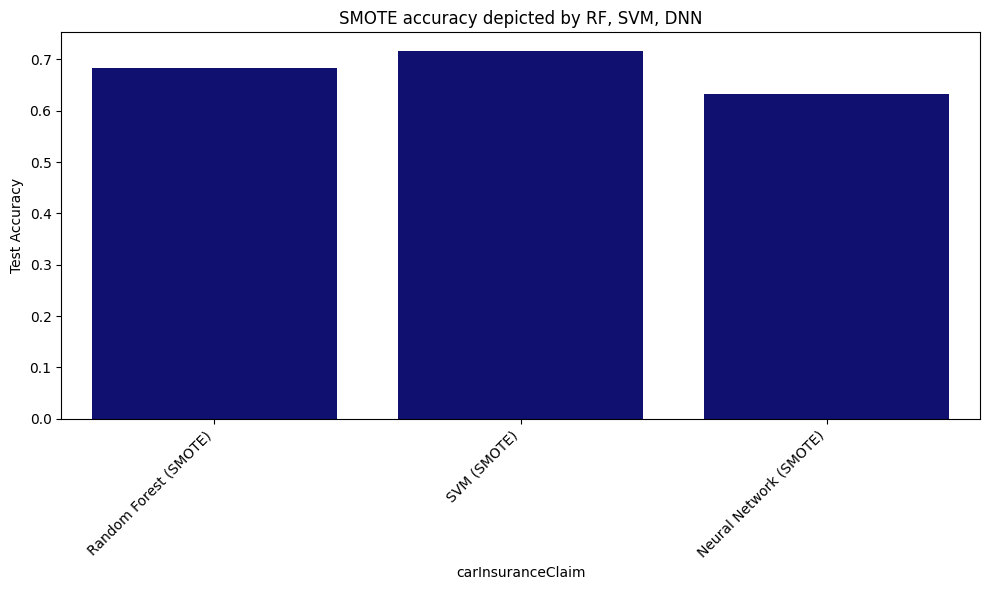

time: 346 ms (started: 2024-03-04 04:31:13 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#ADASYN Sampling (RF, SVM, DNN)

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution before ADASYN:
0    168
1     71
Name: DEATH_EVENT, dtype: int64
Class distribution after ADASYN:
1    175
0    168
Name: DEATH_EVENT, dtype: int64
time: 18.7 ms (started: 2024-03-04 04:31:14 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.6666666666666666


,0,1,accuracy,macro avg,weighted avg
precision,0.674419,0.647059,0.666667,0.660739,0.663019
recall,0.828571,0.440000,0.666667,0.634286,0.666667
f1-score,0.743590,0.523810,0.666667,0.633700,0.652015
support,35.000000,25.000000,0.666667,60.000000,60.000000


time: 229 ms (started: 2024-03-04 04:31:14 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)

Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       0.67      0.56      0.61        25

    accuracy                           0.70        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.70      0.70      0.70        60

time: 24.4 ms (started: 2024-03-04 04:31:14 +00:00)


In [ ]:


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(y_val.value_counts())

adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

0    19
1    11
Name: DEATH_EVENT, dtype: int64
Epoch 1/10
8/8 [==============================] - 1s 28ms/step - loss: 0.6383 - accuracy: 0.6987 - val_loss: 0.7403 - val_accuracy: 0.4750
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5986 - accuracy: 0.6946 - val_loss: 0.7331 - val_accuracy: 0.5250
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5674 - accuracy: 0.7238 - val_loss: 0.7459 - val_accuracy: 0.5250
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5426 - accuracy: 0.7406 - val_loss: 0.7591 - val_accuracy: 0.5250
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.5187 - accuracy: 0.7615 - val_loss: 0.7842 - val_accuracy: 0.5250
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.5004 - accuracy: 0.7782 - val_loss: 0.8149 - val_accuracy: 0.5250
Epoch 7/10
8/8 [==============================] - 0s 22ms/step - loss: 0.4817 - accuracy: 0.7866 - val_loss: 0.8155 - val_

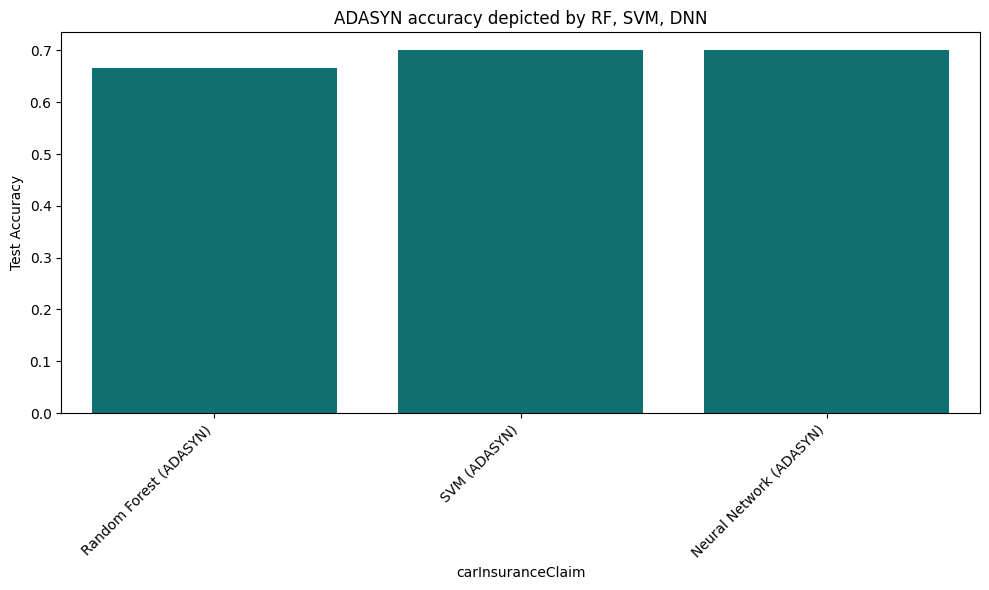

time: 505 ms (started: 2024-03-04 04:31:16 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='teal')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#Random Oversampling (RF, SVM, DNN)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
1    168
0    168
Name: DEATH_EVENT, dtype: int64
time: 9.28 ms (started: 2024-03-04 04:31:17 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_ros = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_ros)

pd.DataFrame(precision_recall)

Accuracy: 0.7


,0,1,accuracy,macro avg,weighted avg
precision,0.684211,0.727273,0.7,0.705742,0.704306
recall,0.812500,0.571429,0.7,0.691964,0.700000
f1-score,0.742857,0.640000,0.7,0.691429,0.694857
support,16.000000,14.000000,0.7,30.000000,30.000000


time: 400 ms (started: 2024-03-04 04:31:17 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_ros = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_ros)
print("\nClassification Report:\n", report)

Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.71      0.71      0.71        14

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30

time: 38 ms (started: 2024-03-04 04:31:17 +00:00)


In [ ]:

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(y_val.value_counts())

# Apply ros to balance the training set
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_ros = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

0    19
1    11
Name: DEATH_EVENT, dtype: int64
Epoch 1/10
8/8 [==============================] - 2s 40ms/step - loss: 0.7458 - accuracy: 0.4100 - val_loss: 0.7102 - val_accuracy: 0.3947
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6587 - accuracy: 0.6444 - val_loss: 0.7250 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6140 - accuracy: 0.6987 - val_loss: 0.7529 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5827 - accuracy: 0.7029 - val_loss: 0.7730 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 0.5570 - accuracy: 0.7029 - val_loss: 0.7931 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5348 - accuracy: 0.7029 - val_loss: 0.8101 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5149 - accuracy: 0.7197 - val_loss: 0.8147 - val_a

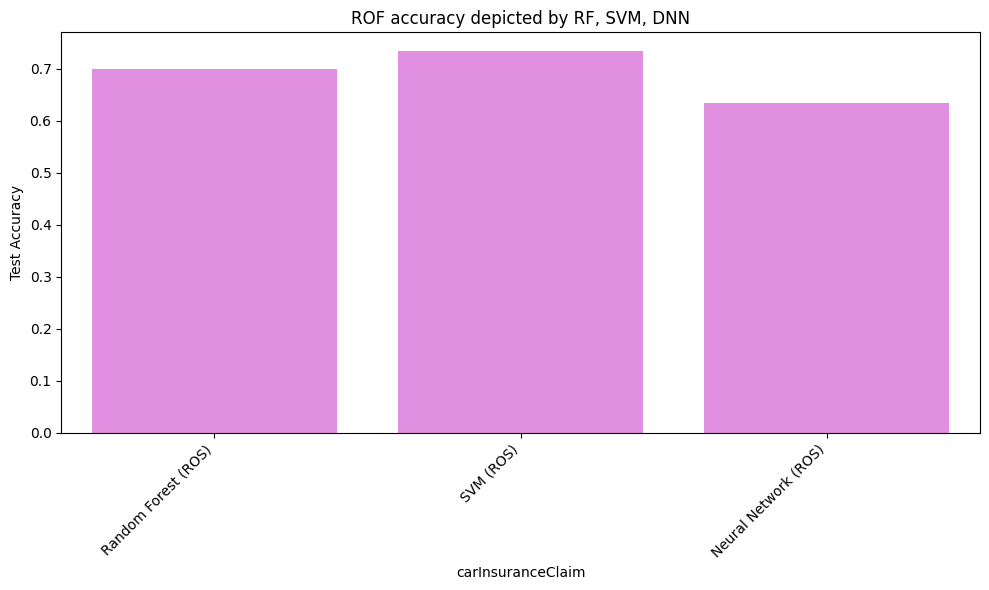

time: 323 ms (started: 2024-03-04 04:30:43 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ROS)': accuracy_rf_ros,
    'SVM (ROS)': accuracy_svm_ros,
    'Neural Network (ROS)': accuracy_dnn_ros,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'violet')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

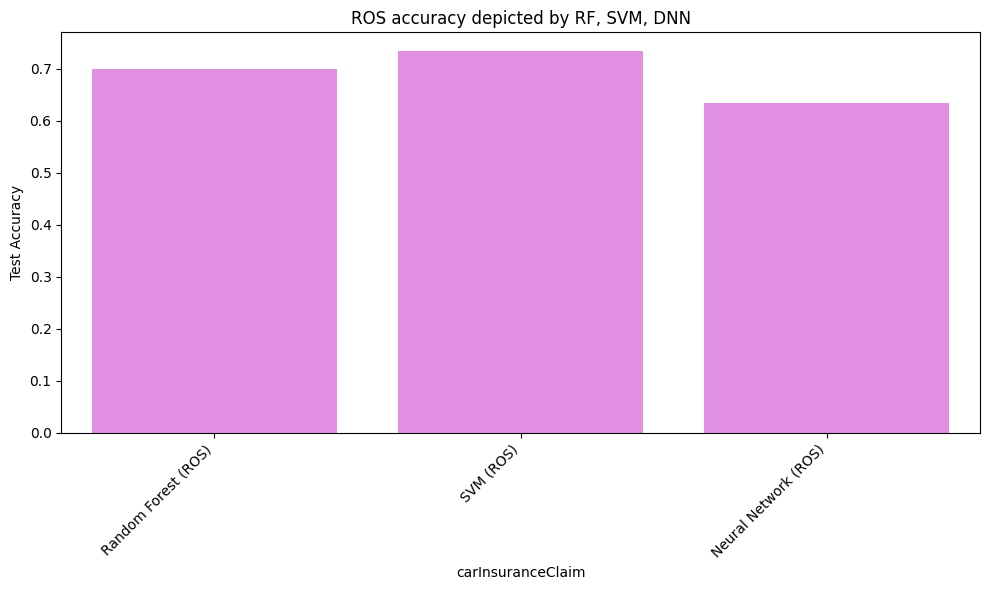

time: 296 ms (started: 2024-03-04 04:30:44 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ROS)': accuracy_rf_ros,
    'SVM (ROS)': accuracy_svm_ros,
    'Neural Network (ROS)': accuracy_dnn_ros,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'violet')
plt.xticks(rotation=45, ha='right')
plt.title('ROS accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#Random Under Sampling (RF, SVM, DNN)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random undersampling:
0    71
1    71
Name: DEATH_EVENT, dtype: int64
time: 8.64 ms (started: 2024-03-04 04:30:44 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_rus = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_rus)

pd.DataFrame(precision_recall)

Accuracy: 0.8


,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.750000,0.8,0.803571,0.807143
recall,0.750000,0.857143,0.8,0.803571,0.800000
f1-score,0.800000,0.800000,0.8,0.800000,0.800000
support,16.000000,14.000000,0.8,30.000000,30.000000


time: 205 ms (started: 2024-03-04 04:30:44 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_rus = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_rus)
print("\nClassification Report:\n", report)

Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.71      0.71      0.71        14

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30

time: 19.9 ms (started: 2024-03-04 04:30:44 +00:00)


In [ ]:

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(y_val.value_counts())

# Apply rus to balance the training set
rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_rus = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

0    19
1    11
Name: DEATH_EVENT, dtype: int64
Epoch 1/10
8/8 [==============================] - 1s 34ms/step - loss: 0.7022 - accuracy: 0.4979 - val_loss: 0.6901 - val_accuracy: 0.5455
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6299 - accuracy: 0.7029 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 0.5898 - accuracy: 0.6987 - val_loss: 0.7289 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5646 - accuracy: 0.7071 - val_loss: 0.7491 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5417 - accuracy: 0.7197 - val_loss: 0.7598 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5204 - accuracy: 0.7406 - val_loss: 0.7597 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5003 - accuracy: 0.7615 - val_loss: 0.7584 - val_a

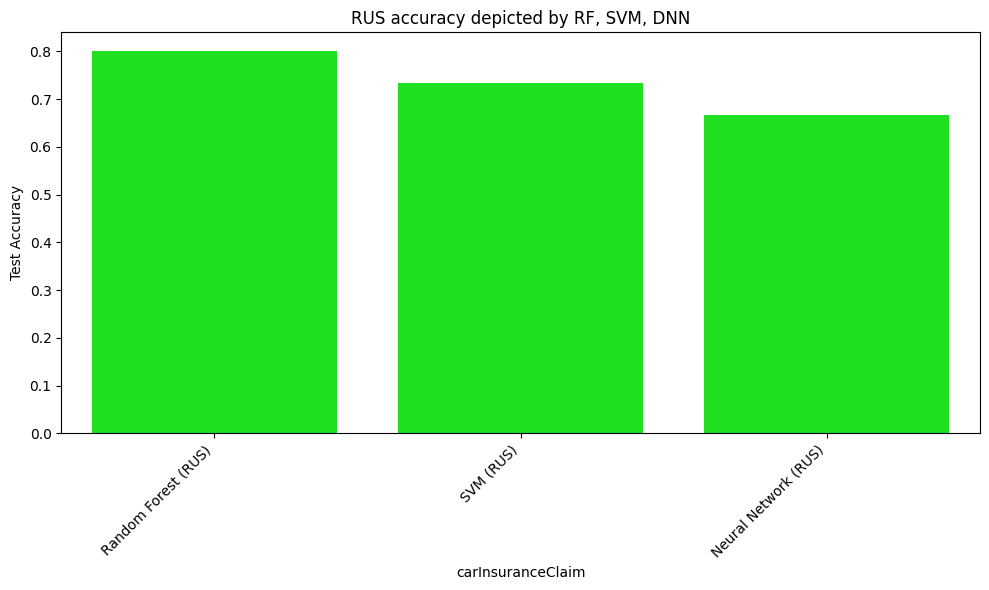

time: 333 ms (started: 2024-03-04 04:30:47 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (RUS)': accuracy_rf_rus,
    'SVM (RUS)': accuracy_svm_rus,
    'Neural Network (RUS)': accuracy_dnn_rus,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'lime')
plt.xticks(rotation=45, ha='right')
plt.title('RUS accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#GAMMA Distribution Sampling (RF, SVM, DNN)

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 1]
X_majority = X_scaled[y == 0]

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
1.0    96
0.0    96
dtype: int64
time: 9.4 ms (started: 2024-03-04 04:30:47 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy: 0.4666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.0,0.466667,0.466667,0.233333,0.217778
recall,0.0,1.000000,0.466667,0.500000,0.466667
f1-score,0.0,0.636364,0.466667,0.318182,0.296970
support,16.0,14.000000,0.466667,30.000000,30.000000


time: 751 ms (started: 2024-03-04 04:30:47 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.60      0.86      0.71        14

    accuracy                           0.67        30
   macro avg       0.70      0.68      0.66        30
weighted avg       0.71      0.67      0.66        30

time: 15.5 ms (started: 2024-03-04 04:30:48 +00:00)


In [ ]:

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
5/5 [==============================] - 1s 51ms/step - loss: 0.7379 - accuracy: 0.4052 - val_loss: 0.6715 - val_accuracy: 0.4545
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6507 - accuracy: 0.5556 - val_loss: 0.6562 - val_accuracy: 0.5455
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.5806 - accuracy: 0.7582 - val_loss: 0.6516 - val_accuracy: 0.5909
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.5219 - accuracy: 0.8627 - val_loss: 0.6542 - val_accuracy: 0.6364
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 0.4778 - accuracy: 0.8693 - val_loss: 0.6606 - val_accuracy: 0.5909
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.4377 - accuracy: 0.8693 - val_loss: 0.6730 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 0.4034 - accuracy: 0.8693 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 8/10
5/5 [==============

1/1 [==============================] - 0s 60ms/step
time: 2.77 s (started: 2024-03-04 04:30:48 +00:00)


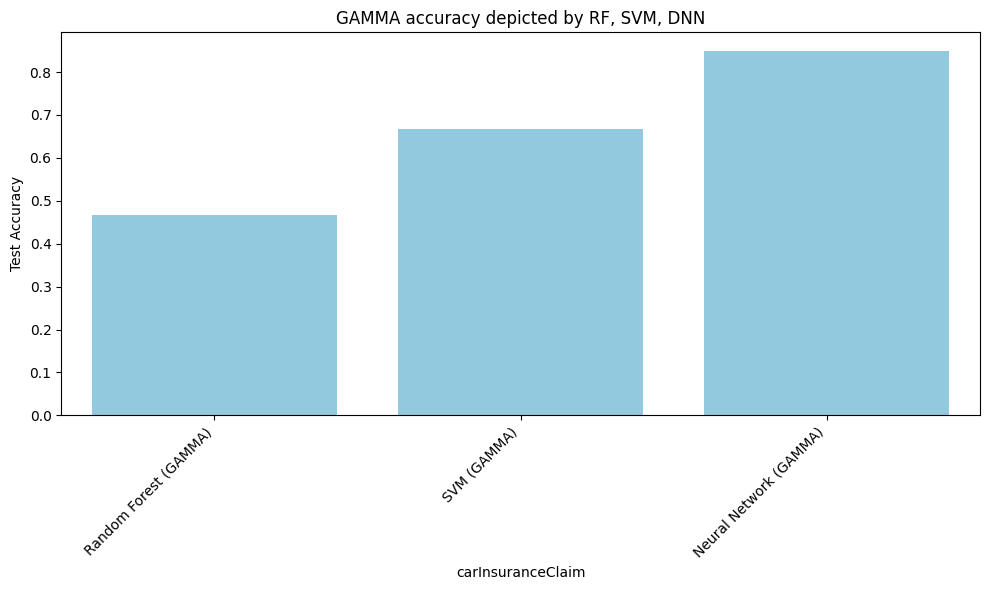

time: 305 ms (started: 2024-03-04 04:30:51 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

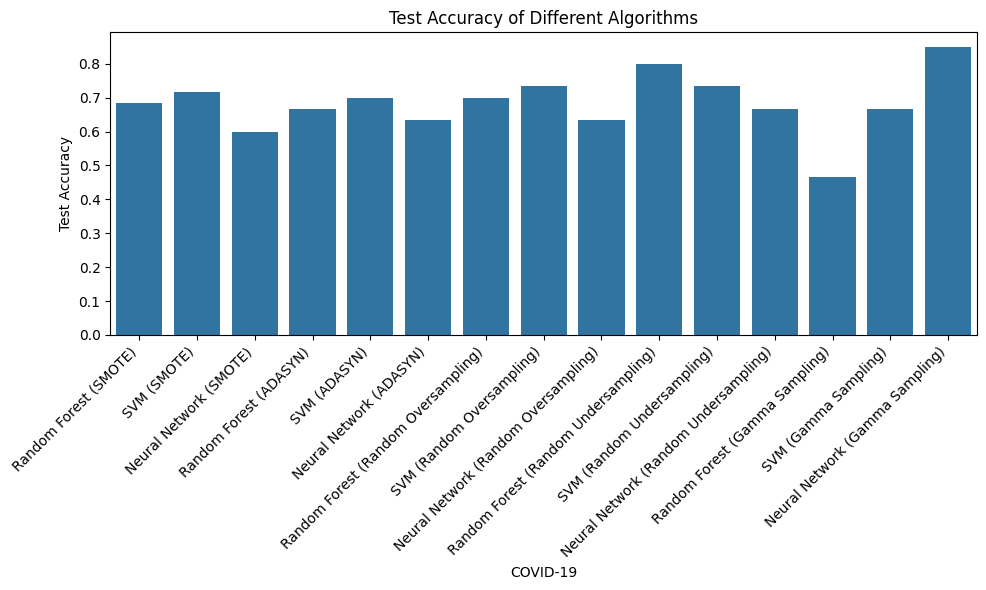

In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_ros,
    'SVM (Random Oversampling)': accuracy_svm_ros,
    'Neural Network (Random Oversampling)': accuracy_dnn_ros,
    'Random Forest (Random Undersampling)': accuracy_rf_rus,
    'SVM (Random Undersampling)': accuracy_svm_rus,
    'Neural Network (Random Undersampling)': accuracy_dnn_rus,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('COVID-19')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#End of Analysis

In [ ]:
SMOTE_mean = (accuracy_svm + accuracy_rf + accuracy_dnn)/3 *100
print("SMOTE avg : ", SMOTE_mean)

adasyn_mean = (accuracy_svm_adasyn + accuracy_rf_adasyn + accuracy_dnn_adasyn)/3 *100
print("adasyn avg : ", adasyn_mean)

ros_mean = (accuracy_svm_ros + accuracy_rf_ros + accuracy_dnn_ros)/3 * 100
print("ros avg : ", ros_mean)

rus_mean = (accuracy_svm_rus + accuracy_rf_rus + accuracy_dnn_rus)/3 * 100
print("rus avg : ", rus_mean)

gamma_mean = (accuracy_svm_gamma + accuracy_rf_gamma + accuracy_dnn_gamma)/3 * 100
print("gamma avg : ", gamma_mean)

time: 454 ms (started: 2024-03-04 04:30:51 +00:00)
SMOTE avg :  66.66666746139526
adasyn avg :  66.66666640175714
ros avg :  68.88888862397935
rus avg :  73.33333399560716
gamma avg :  66.1111119058397
time: 3.82 ms (started: 2024-03-04 04:30:52 +00:00)
